In [58]:
# This is partially equivalent to %pylab inline, except expanded

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [59]:
import zipfile

In [60]:
zipped = zipfile.ZipFile('data/taxirides.csv.zip')
file_list = zipped.namelist()
print(file_list)

['firstday.csv']


In [61]:
file_in_archive = file_list[0]

with zipped.open(file_in_archive, 'r') as f:
    line = f.readline()
    print(line)
    line2 = f.readline()
    print(line2)

b'passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude\n'
b'4,382,1.0,-73.978165,40.757977000000004,-73.989838,40.751171\n'


In [5]:
with zipped.open(file_list[0]) as f:
    data = np.genfromtxt(f, skip_header=1, delimiter=',')

In [6]:
data.shape

(412630, 7)

In [7]:
data[0]

array([   4.      ,  382.      ,    1.      ,  -73.978165,   40.757977,
        -73.989838,   40.751171])

In [8]:
import pandas

with zipped.open(file_list[0]) as f:
    data = pandas.read_csv(f)

In [49]:
data

,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,4,382,1.00,-73.978165,40.757977,-73.989838,40.751171
1,1,131,0.50,-73.992172,40.749954,-73.996750,40.744553
2,2,1537,10.20,-73.862709,40.769142,-73.982079,40.762295
3,1,225,1.20,-73.982384,40.752102,-73.993332,40.736393
4,3,327,1.40,-73.987930,40.749542,-73.978981,40.766735
5,2,453,2.10,-73.984734,40.769310,-73.997787,40.744205
6,2,1361,18.90,-73.783318,40.648636,-73.964249,40.719543
7,2,188,0.80,-73.983711,40.756092,-73.984940,40.748222
8,1,587,2.80,-73.959908,40.806396,-73.983292,40.775673
9,2,927,1.80,-73.989059,40.750572,-73.973686,40.755997


In [10]:
data.passenger_count.min()

0

In [11]:
data.passenger_count.max()

6

### Exercise: Calculate the median speed of each taxi ride.

Bonus: Also calculate the mean, and beware `NaN` and ∞!

In [64]:
speed = data.trip_distance / (data.trip_time_in_secs / 3600)
print('Median speed:', speed.median())
speed = speed[np.isfinite(speed)]
print('Mean speed:  ', speed.mean())

Median speed: 14.706927175843694
Mean speed:   18.1353235639


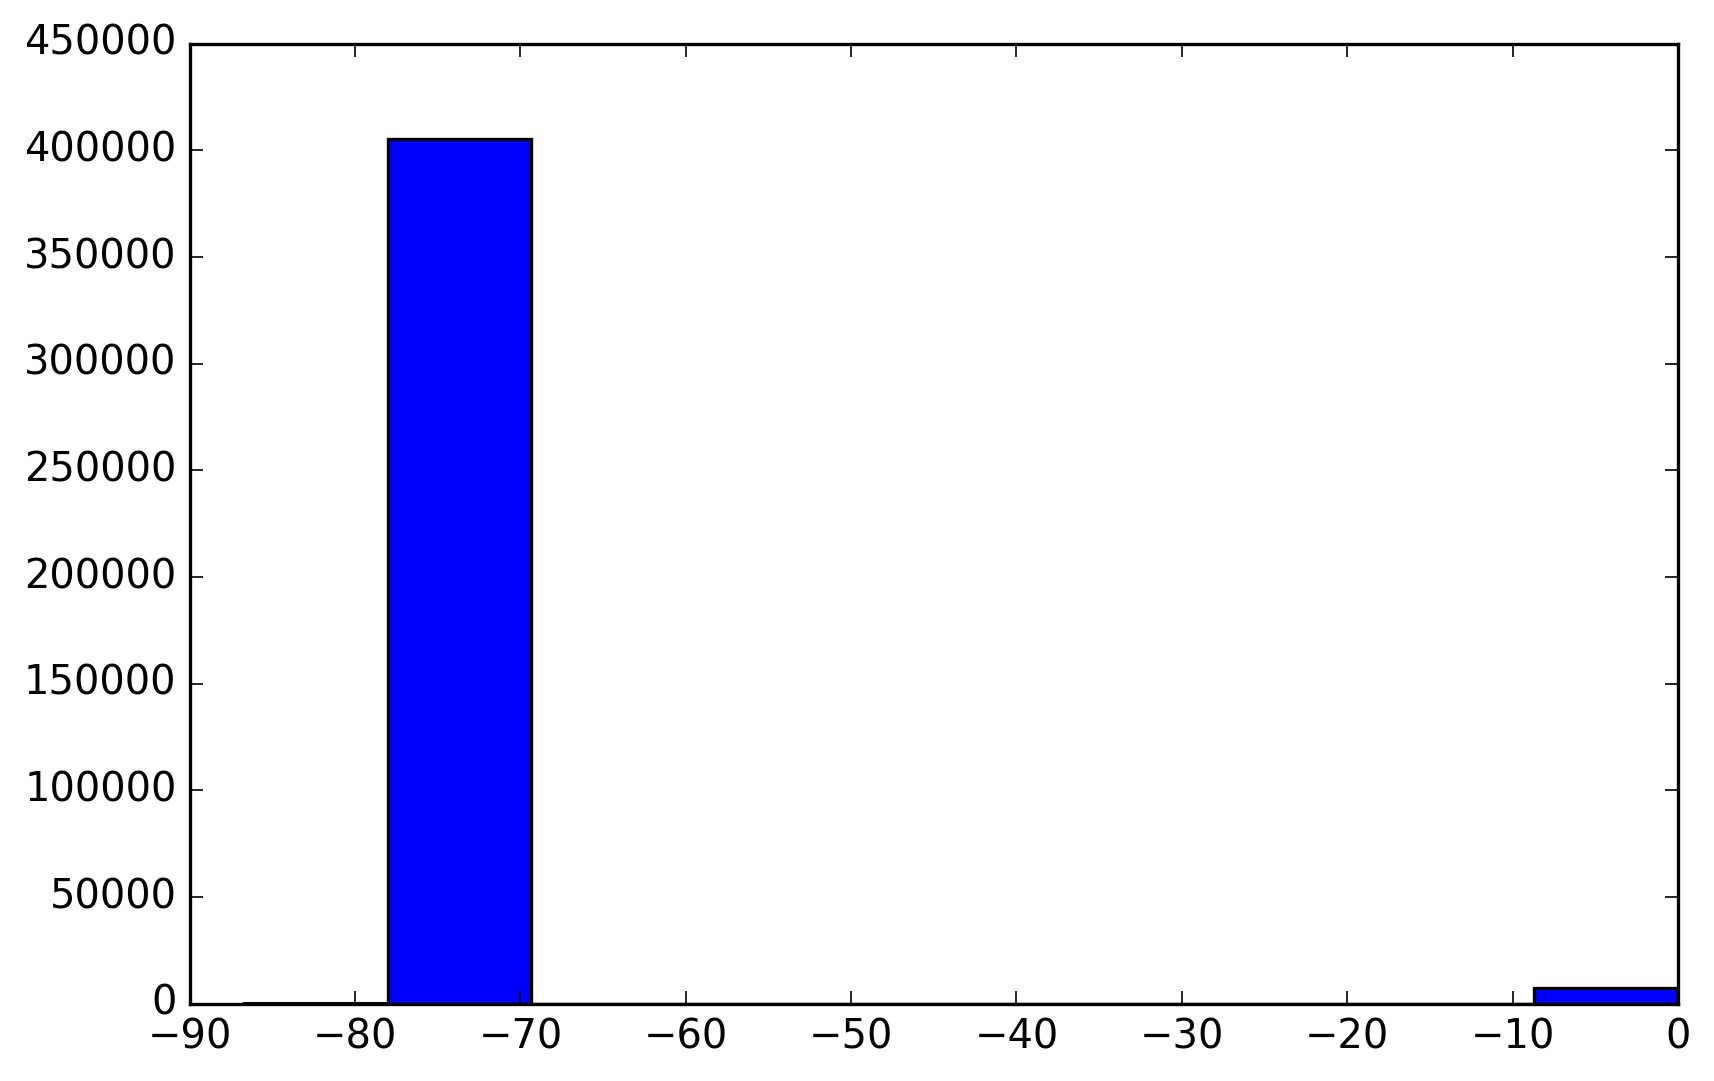

In [15]:
plt.hist(data.pickup_longitude);

In [54]:
def calculate_median_mad(values):
    """
    Calculate the median and MAD (Median Absolute Deviation) from
    a set of values.
    
    A MAD is like a standard deviation, but more robust in the face of
    outliers.
    """
    median = np.median(values)
    mad = np.median(abs(values - median))
    return median, mad

In [48]:
med_long, mad_long = calculate_median_mad(data.pickup_longitude)
std_long = np.std(data.pickup_longitude)
print(mad_long, std_long)

0.012406 9.76513931034


## Making a Module

Now lets make a new Python module! Open a new file, and put this in it:

```python
import numpy as np

def median_mad(values):
    """
    Calculate the median and MAD (Median Absolute Deviation) from
    a set of values.
    
    A MAD is like a standard deviation, but more robust in the face of
    outliers.
    """
    values = np.asarray(values)
    median = np.median(values)
    mad = np.median(abs(values - median))
    return median, mad
```

In [55]:
# Now we import our function from its file
from mad import median_mad

### Exercise

Use the median and MAD to make a histogram of the `pickup_longitude`, with limits of 20 MAD.

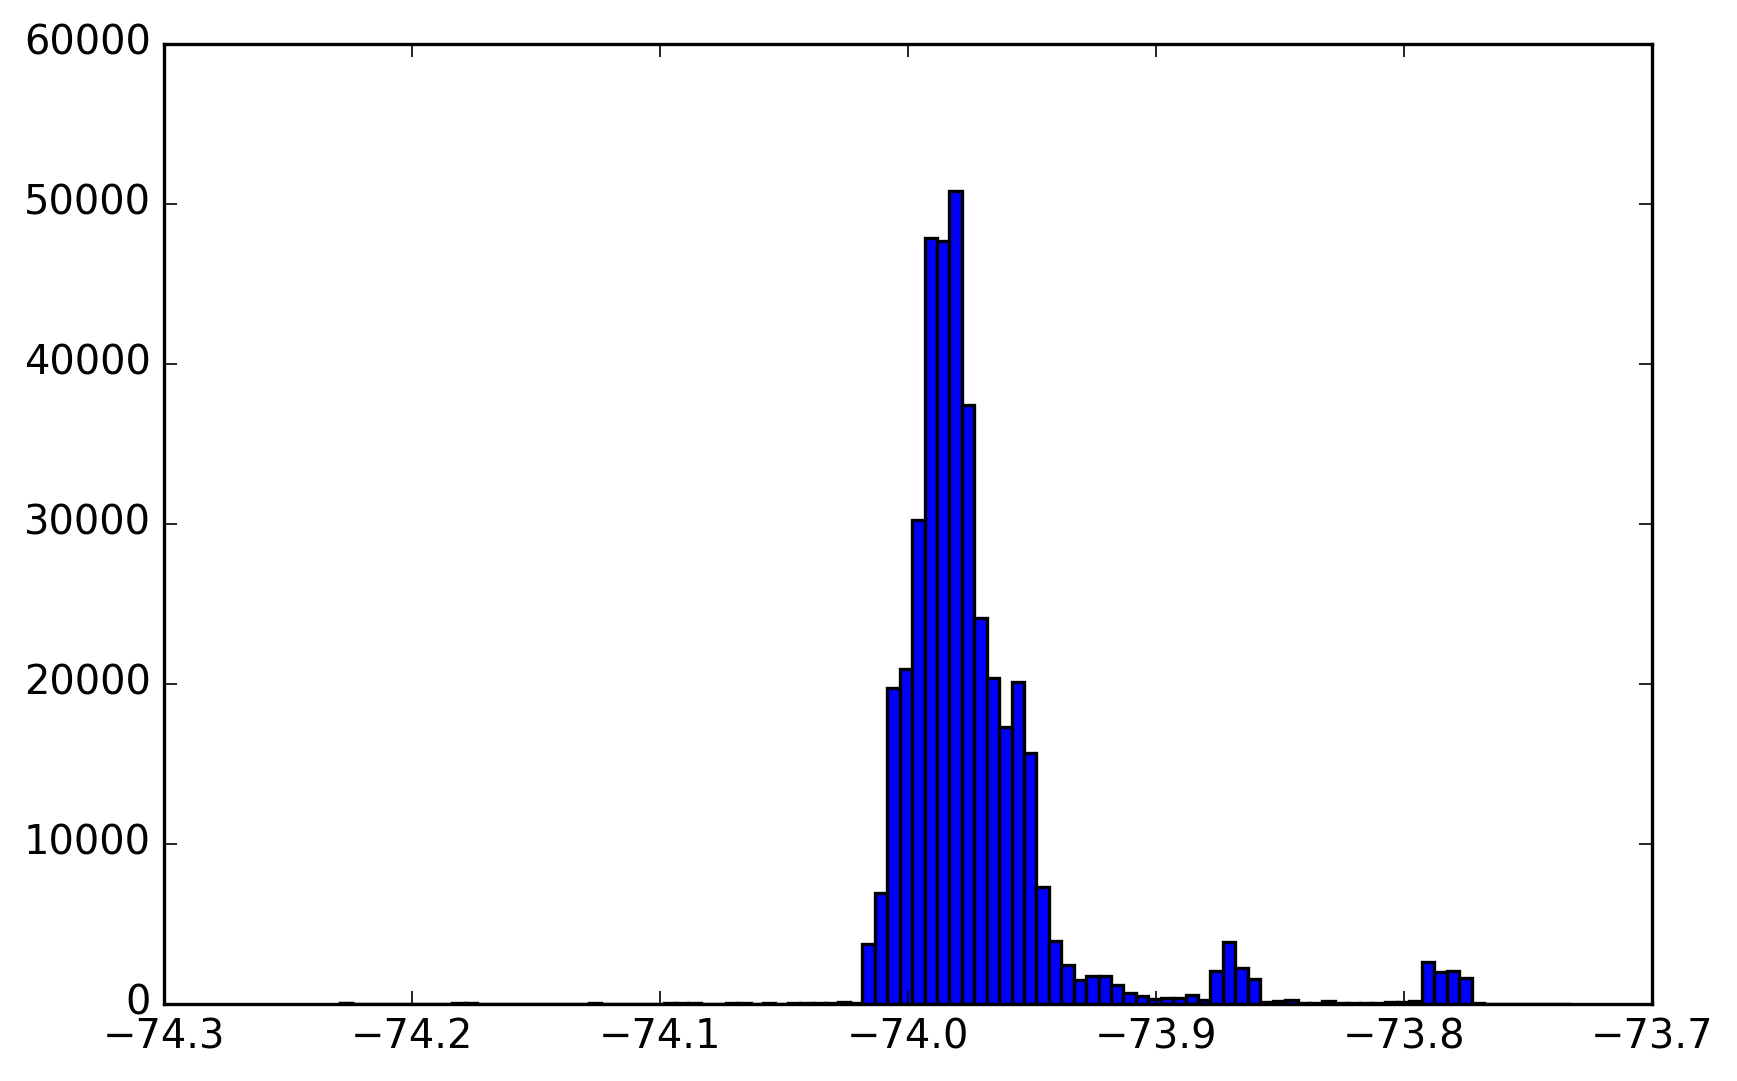

In [46]:
med_long, mad_long = median_mad(data.pickup_longitude)
long_lo = med_long - 20*mad_long
long_hi = med_long + 20*mad_long
plt.hist(data.pickup_longitude, bins=linspace(long_lo, long_hi, 100));

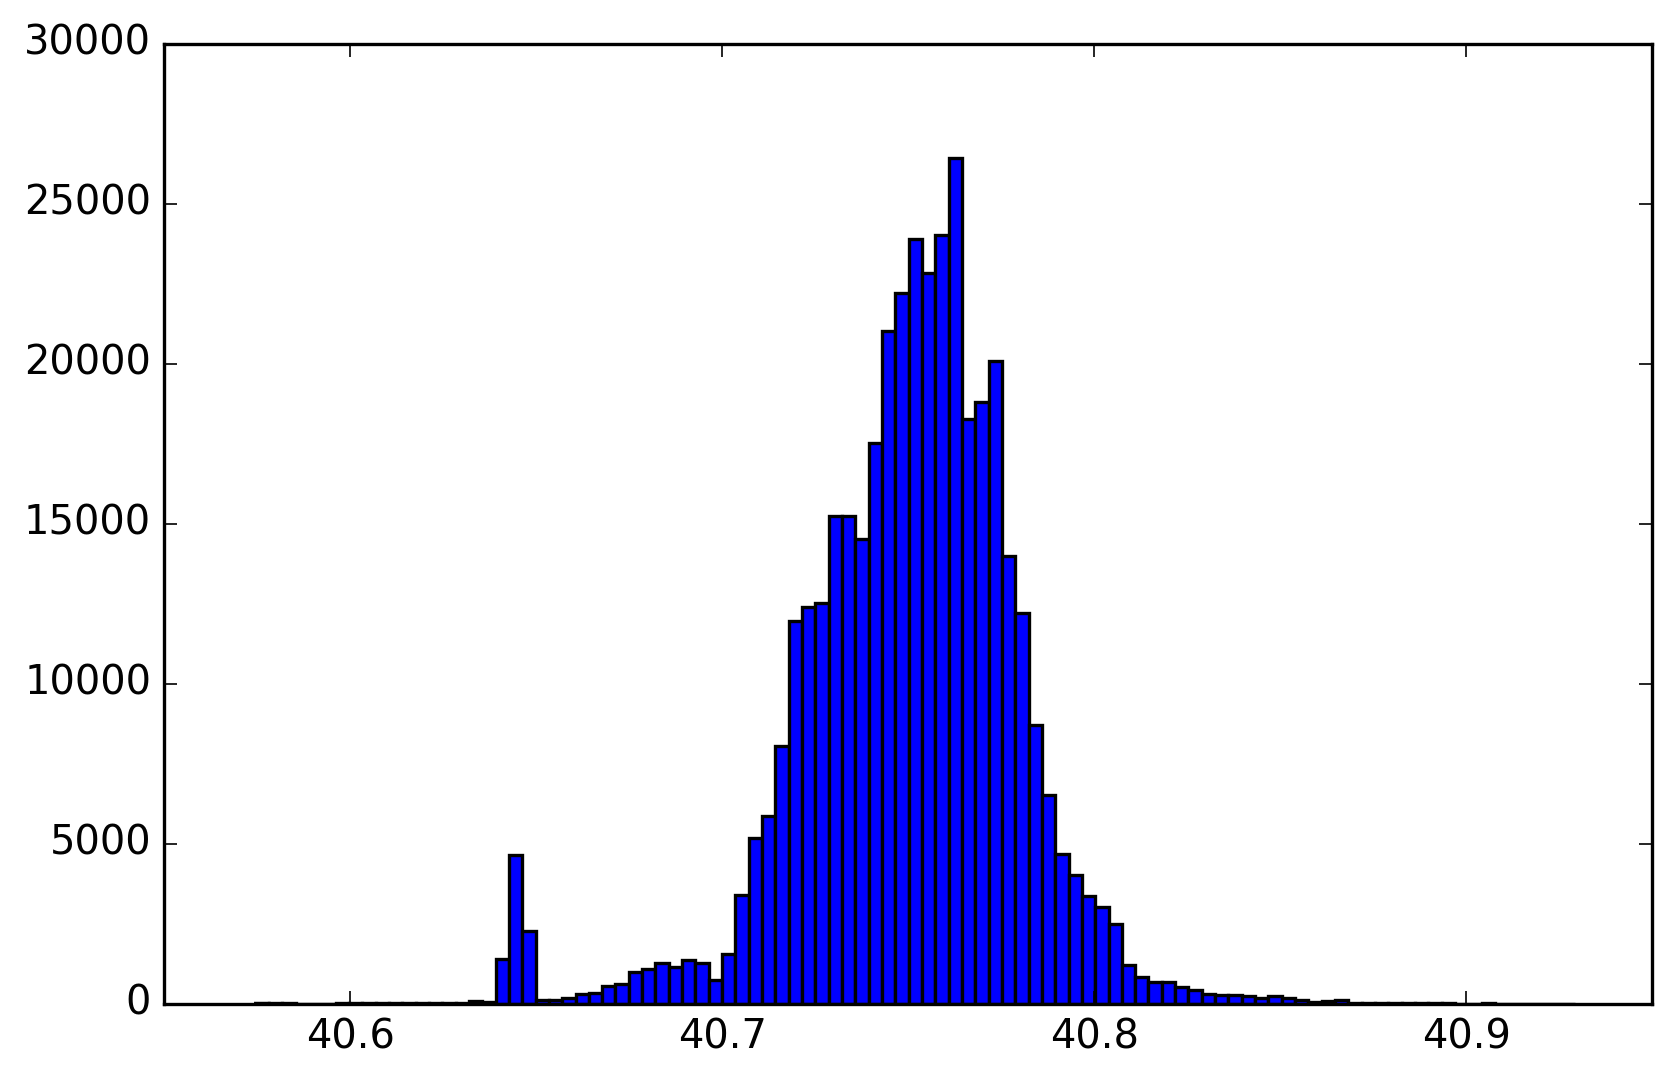

In [25]:
med_lat, mad_lat = calculate_median_mad(data.pickup_latitude)
lat_lo = med_lat - 10*mad_lat
lat_hi = med_lat + 10*mad_lat
plt.hist(data.pickup_latitude, bins=linspace(lat_lo, lat_hi, 100));

(40.57452900000002, 40.929148999999974)

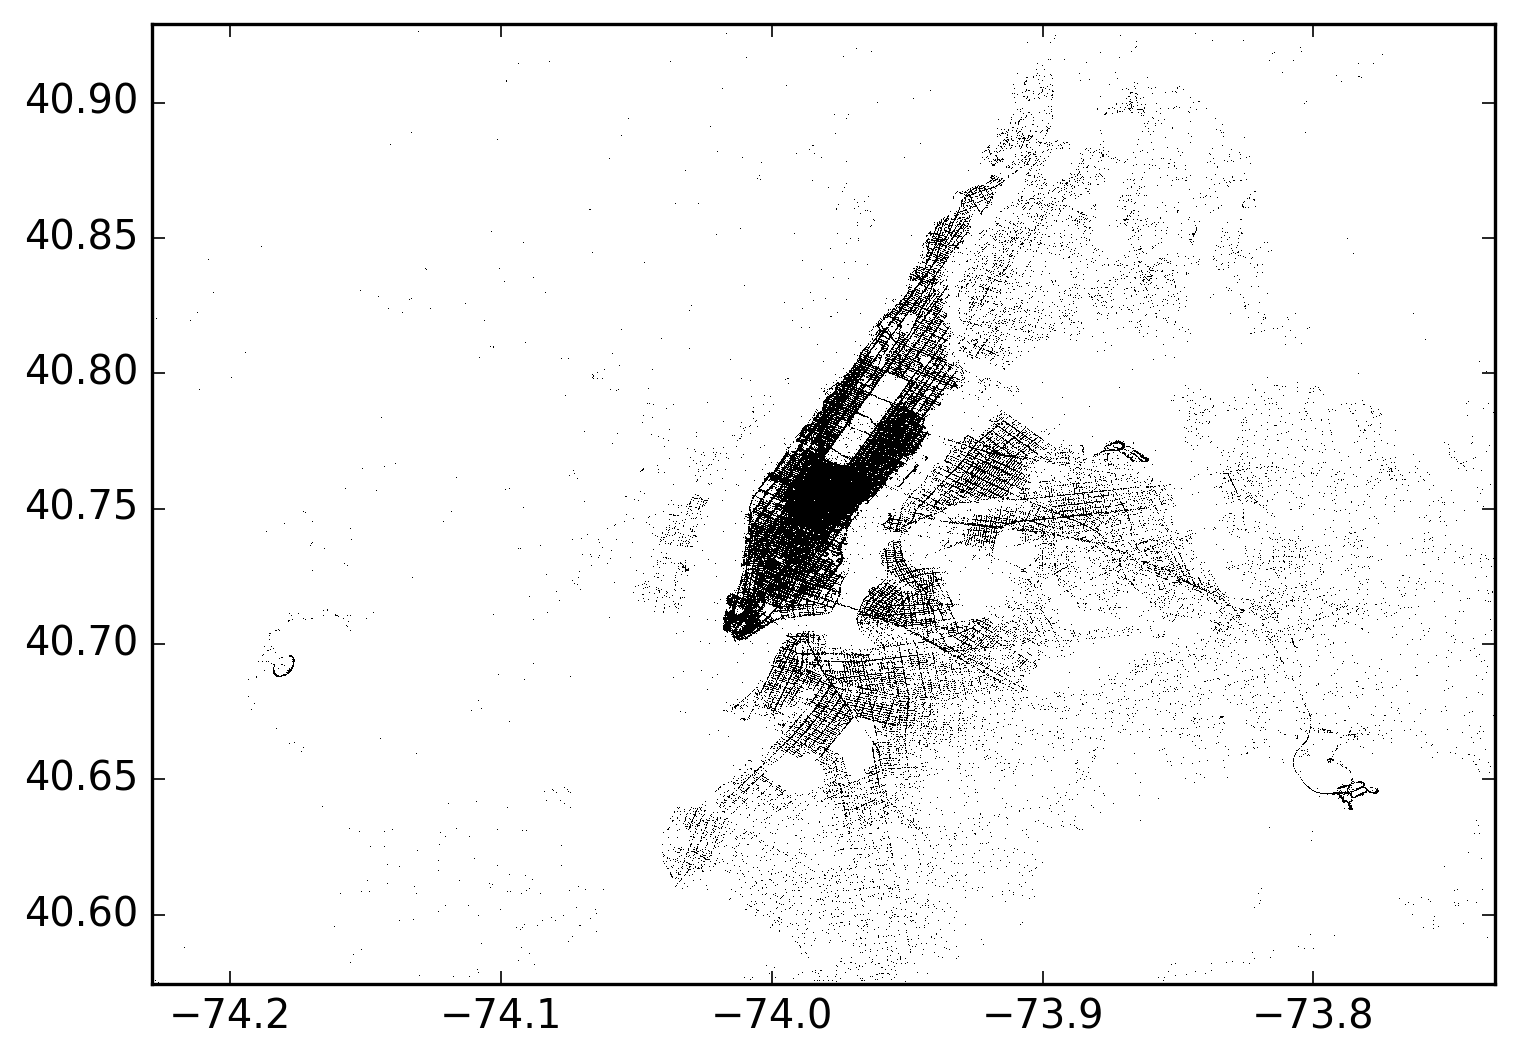

In [34]:
plt.plot(data.dropoff_longitude, data.dropoff_latitude, 'k,')
plt.axis('scaled')
plt.xlim(long_lo, long_hi)
plt.ylim(lat_lo, lat_hi)

Now we go to `File -> Download As -> Python (.py)`, and turn this into a script!

### Exercise

Go to https://docs.python.org/3/library/argparse.html, and use that to allow it to take a different filename!

### Exercise

There are three airports in New York:

Newark, at 40.69°, -74.174°
JFK, at 40.641°, -73.778°
LaGuardia, at 40.777°, -73.874°

Put them in the plot!

In [56]:
nwr = [40.69, -74.174]
jfk = [40.641, -73.778]
lga = [40.777, -73.874]

airports = np.array([nwr, jfk, lga])
airport_lat, airport_long = airports.T

(40.57452900000002, 40.929148999999974)

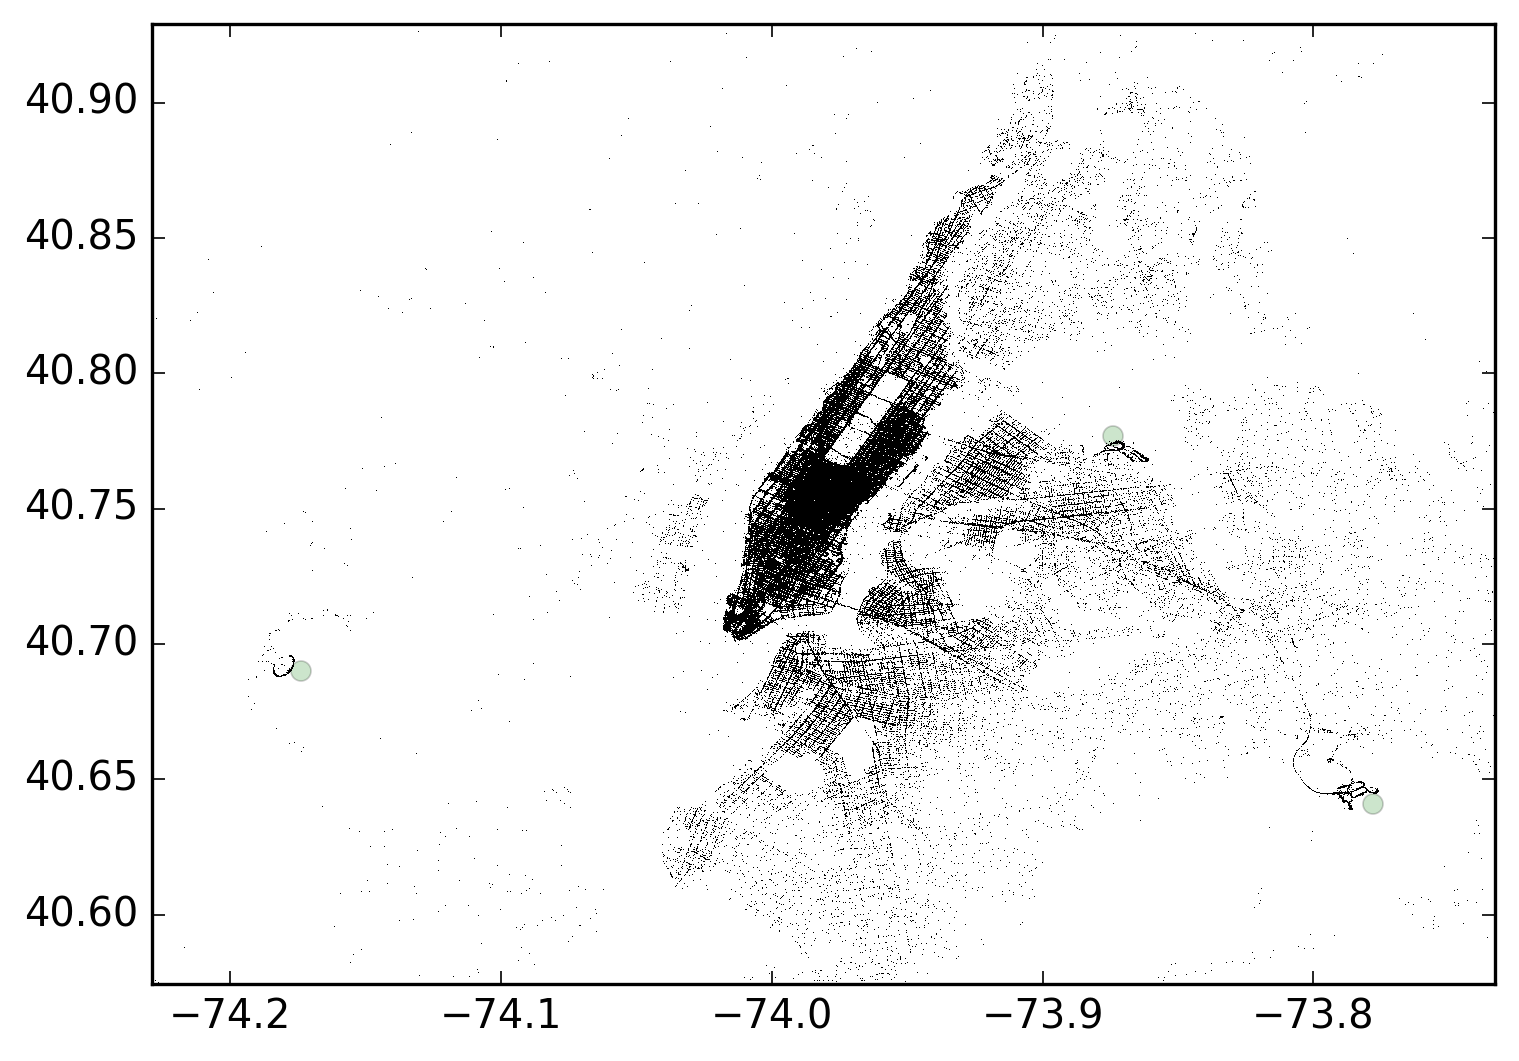

In [57]:
fig, ax = plt.subplots()

ax.plot(airport_long, airport_lat, 'go', alpha=0.2)
ax.plot(data.dropoff_longitude, data.dropoff_latitude, 'k,')
#ax.plot(data.pickup_longitude, data.pickup_latitude, 'r,')

ax.axis('scaled')

ax.set_xlim(long_lo, long_hi)
ax.set_ylim(lat_lo, lat_hi)